# Directly Follows Graph und Petrinetz


In [1]:
import pandas as pd

import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.petri_net.utils import petri_utils

In [2]:
fn = 'ArtificialPatientTreatment.csv'
events = pd.read_csv(fn)

events.columns = ['patient', 'action', 'resource', 'datetime']
events['datetime'] = pd.to_datetime(events['datetime'])
events.head()


,patient,action,resource,datetime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09


In [3]:
eventlog = events.copy()
eventlog.rename(columns={'datetime': 'time:timestamp', 'patient': 'case:concept:name', 'action': 'concept:name', 'resource': 'org:resource'}, inplace=True)

## Convert to log format
log = log_converter.apply(eventlog)


### Directly-follows graph

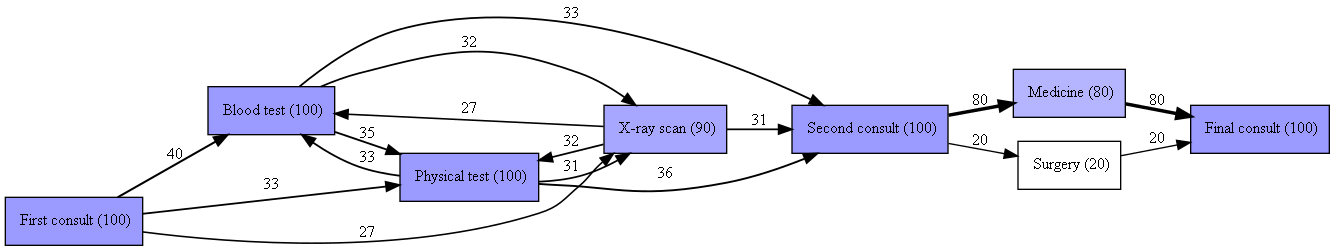

In [4]:
#Create graph from log (annotated with frequency)
dfg = dfg_discovery.apply(log)

# viz
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

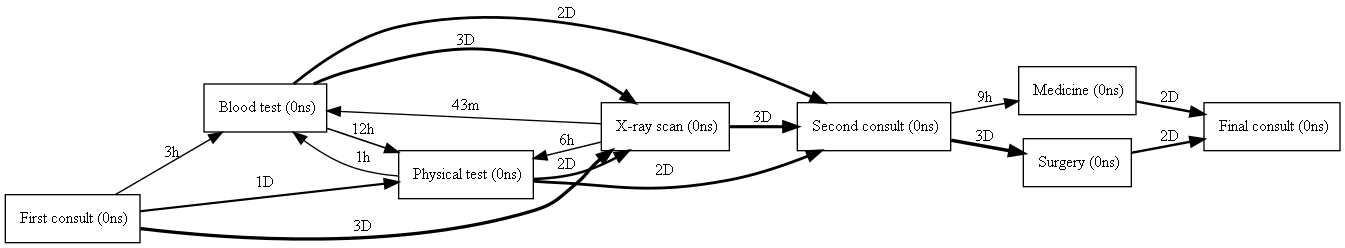

In [5]:
# creatig the graph from log (annotated with time)
dfg = dfg_discovery.apply(eventlog, variant=dfg_discovery.Variants.PERFORMANCE)

# viz
gviz = dfg_visualization.apply(dfg, log=eventlog, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)

### Create petri net

The following code models and analyses a simple process in a doctor's office. A patient first waits to be served. Than she either receives consultation, makes an appointment or gets a prescription.

In [6]:
# create the net
net = PetriNet("doctor_net")

In [7]:
# creating places: source, p_1 and sink place
source = PetriNet.Place("source")
sink = PetriNet.Place("sink")
p_1 = PetriNet.Place("p_1")
# add the places to the Petri Net
net.places.add(source)
net.places.add(sink)
net.places.add(p_1)

In [8]:
# Create transitions
t_1 = PetriNet.Transition("waiting", "waiting")
t_2 = PetriNet.Transition("appointment", "appointment")
t_3 = PetriNet.Transition("prescription", "prescription")
t_4 = PetriNet.Transition("consultation", "consultation")

# Add the transitions to the Petri Net
net.transitions.add(t_1)
net.transitions.add(t_2)
net.transitions.add(t_3)
net.transitions.add(t_4)

In [9]:
# Add arcs
petri_utils.add_arc_from_to(source, t_1, net)
petri_utils.add_arc_from_to(t_1, p_1, net)
petri_utils.add_arc_from_to(p_1, t_2, net)
petri_utils.add_arc_from_to(t_2, sink, net)
petri_utils.add_arc_from_to(p_1, t_3, net)
petri_utils.add_arc_from_to(t_3, sink, net)
petri_utils.add_arc_from_to(p_1, t_4, net)
petri_utils.add_arc_from_to(t_4, sink, net)

(consultation, 'consultation')->sink

In [10]:
# Adding tokens
initial_marking = Marking()
initial_marking[source] = 1
final_marking = Marking()
final_marking[sink] = 1

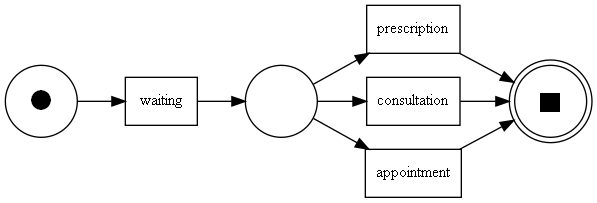

In [11]:
pm4py.view_petri_net(net, initial_marking, final_marking)